<a href="https://colab.research.google.com/github/heasun0111/Machine-learning/blob/master/Learning%20Rate(0.1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


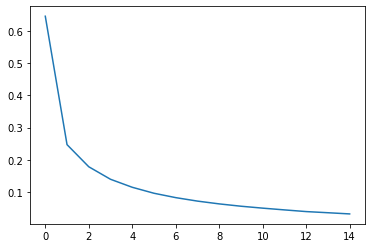

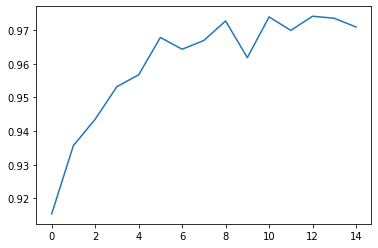

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim


batch_size = 100
lr = 0.1
training_epoch = 15

download_root = './MNIST_DOWNLOAD'
dataset = datasets.MNIST(
    download_root, transform=transforms.ToTensor(), train=True, download=True)

train_data = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

dataloader = DataLoader(dataset = train_data , batch_size=batch_size, shuffle=True, drop_last = True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)
    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)
        return x5

model = Net()
entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

x_test = test_data.test_data.view(-1, 784).float().to()
y_test = test_data.test_labels.to()

epochs=[]
losses=[]
accuracy=[]

for epoch in range(training_epoch):
    avg_loss = 0
    total_batch = len(dataloader)
    epochs.append(epoch)
    for x, y in dataloader:
        x_batch = x.view(-1, 784)
        y_batch = y.to()
        optimizer.zero_grad()
        hypothesis = model(x_batch)
        loss = entropy(hypothesis, y_batch)
        loss.backward()
        optimizer.step()
        avg_loss += loss / total_batch
    correct_prediction = torch.argmax(model(x_test), 1) == y_test
    acc = correct_prediction.float().mean()
    losses.append(avg_loss.item())
    accuracy.append(acc.item())

plt.figure(1)
plt.plot(epochs, losses)
plt.figure(2)
plt.plot(epochs, accuracy)
plt.show()